<a href="https://colab.research.google.com/github/adesai1033/MATH452/blob/main/Final%20Project/CNN/project2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Resizing
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.applications.resnet50 import preprocess_input

# Data Preprocessing


*   Load the CIFAR-10 dataset.
* Visualize dataset.
*   Normalize dataset.



In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


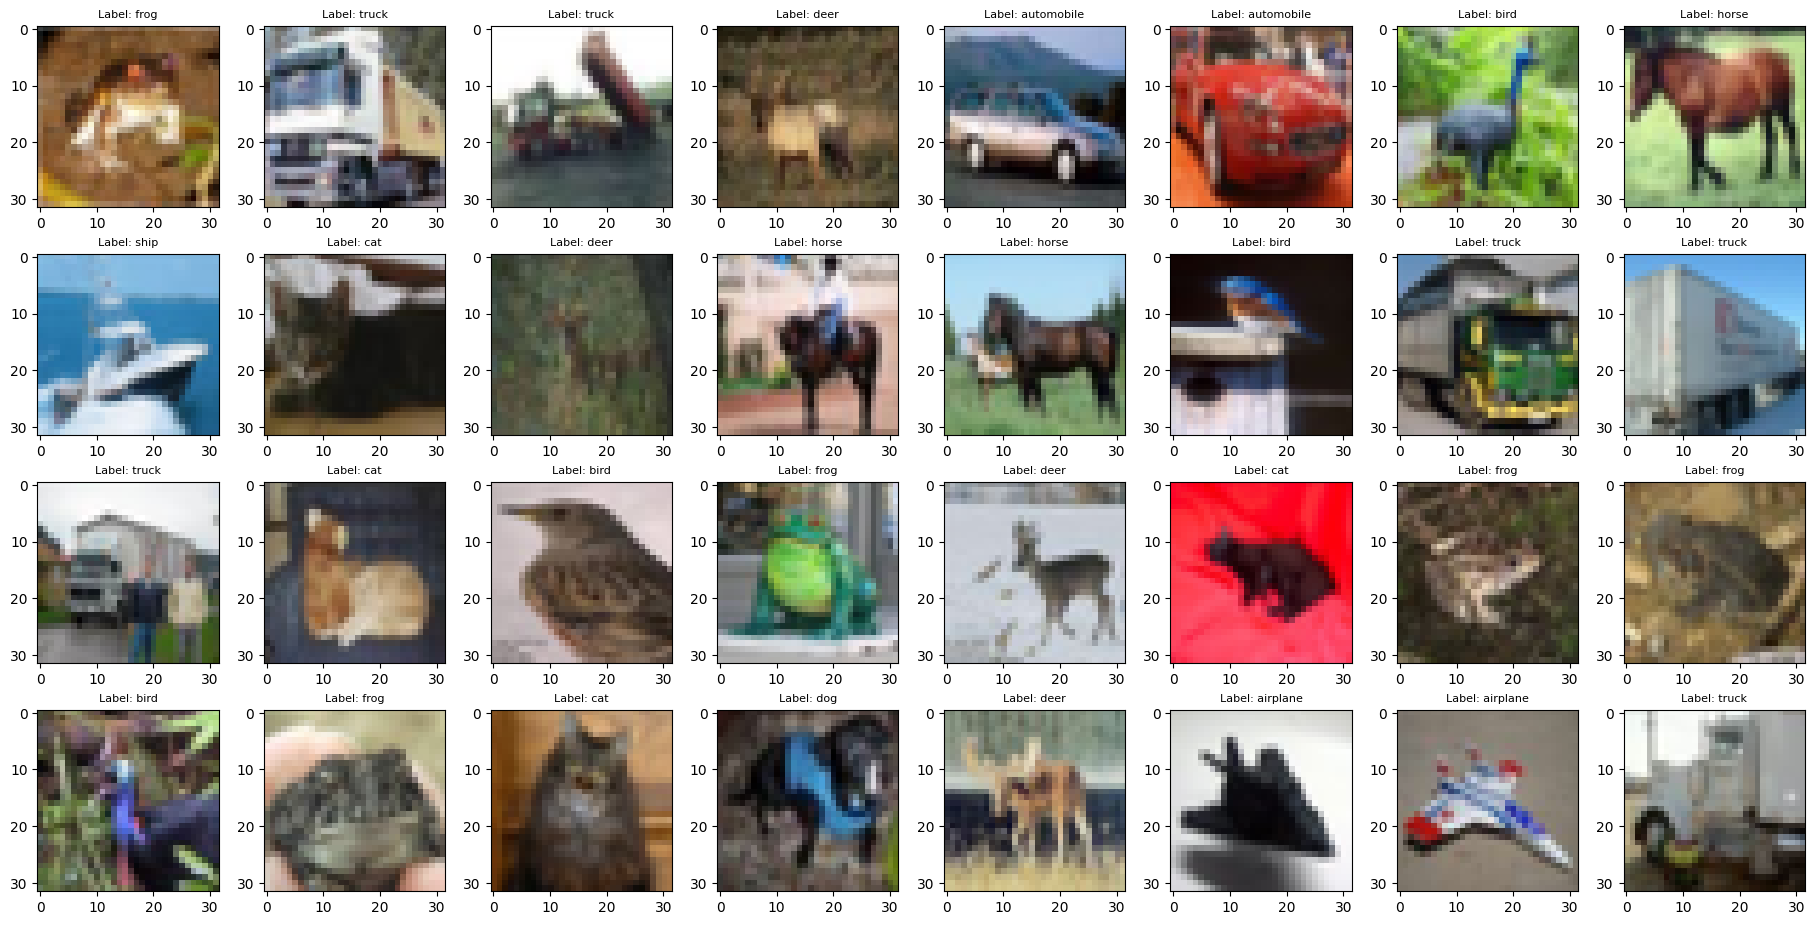

In [4]:
# Display first 32 images of the dataset with its label.
label_mapping = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(label_mapping[y_train[i]]), fontsize=8)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig('cifar10_images.png', dpi=300)
plt.show()

In [5]:
# The preprocessing adjusts the data to match the distribution of the original training dataset.
X_train_proc = preprocess_input(X_train)
X_test_proc = preprocess_input(X_test)


# Baseline CNN Model

*   Designed and implemented a simple Convolutional Neural Network (CNN) architecture for classification
*   Included basic layers: convolutional layers, activation functions, pooling layers, and fully connected layers.
* Compiled the model with an optimizer (Adam), and loss function (categorical cross-entropy)
* Incorporated ResNet50, a pre-trained deep residual network, to improve feature extraction by leveraging ImageNet-trained weights
* Adapted ResNet50 by adding pooling, dense layers, and dropout, enabling it to specialize in CIFAR-10 classification while preserving computational efficiency


In [6]:
from tensorflow.keras.applications import EfficientNetB0

efficientnet_base = EfficientNetB0(
    include_top=False, weights="imagenet", input_shape=(224, 224, 3)
)
efficientnet_base.trainable = False  # Freeze the base model initially

model = Sequential([
    Input(shape=(32, 32, 3)),
    Resizing(224, 224),
    efficientnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Train the Baseline Model


*   Trained the baseline CNN using the training set and evaluate performance on the validation set.
*   Record metrics: accuracy, precision, recall, F1-score, and loss


In [8]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])
history = model.fit(X_train_proc, y_train, batch_size=100, epochs=50, validation_data = (X_test_proc, y_test))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 72s 83ms/step - accuracy: 0.6765 - loss: 0.9533 - val_accuracy: 0.8424 - val_loss: 0.4651
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8128 - loss: 0.5519 - val_accuracy: 0.8459 - val_loss: 0.4379
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8296 - loss: 0.4908 - val_accuracy: 0.8549 - val_loss: 0.4124
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.8424 - loss: 0.4599 - val_accuracy: 0.8642 - val_loss: 0.3958
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8492 - loss: 0.4364 - val_accuracy: 0.8644 - val_loss: 0.3918
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8559 - loss: 0.4211 - val_accuracy: 0.8650 - val_loss: 0.3857
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8568 - loss: 0.4082 - val_accuracy: 0.8678 - val_loss: 0.3775
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8578 - loss: 0.4083 - 

In [9]:
# Evaluate the model
y_pred_probs = model.predict(X_test_proc)
y_pred = np.argmax(y_pred_probs, axis = 1)

# Compute Metrics
y_test_flat = y_test.flatten()
precision = precision_score(y_test_flat, y_pred, average = 'weighted')
recall = recall_score(y_test_flat, y_pred, average = 'weighted')
f1 = f1_score(y_test_flat, y_pred, average = 'weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test_flat, y_pred, target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step
Precision: 0.88
Recall: 0.88
F1-Score: 0.88

Classification Report:
               precision    recall  f1-score   support

    airplane       0.88      0.92      0.90      1000
  automobile       0.95      0.93      0.94      1000
        bird       0.91      0.82      0.87      1000
         cat       0.77      0.77      0.77      1000
        deer       0.85      0.88      0.86      1000
         dog       0.80      0.83      0.82      1000
        frog       0.87      0.91      0.89      1000
       horse       0.93      0.88      0.90      1000
        ship       0.93      0.94      0.93      1000
       truck       0.93      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



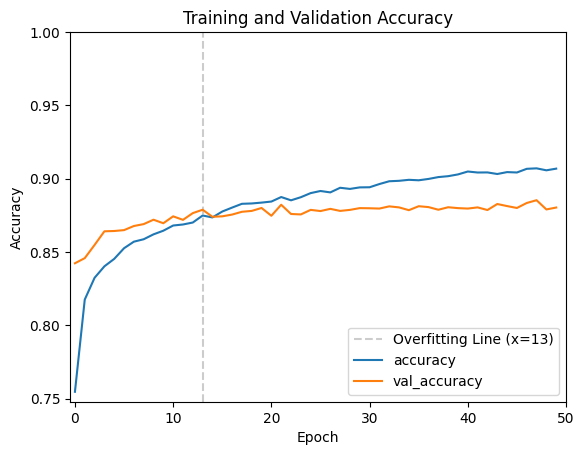

In [19]:
# Plotting training accuracy and validation accuracy

plt.axvline(x=13, linestyle='--', color = 'gray', alpha = 0.4, label = 'Overfitting Line (x=13)') # Overfitting Line at x = 20
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.xlim(-0.5, 50)
plt.ylim(0.748, 1)

plt.savefig('cifar10-accuracy.png', dpi=300)
plt.show()

# test_loss, test_acc = model.evaluate(X_test_proc,  y_test, verbose = 2)

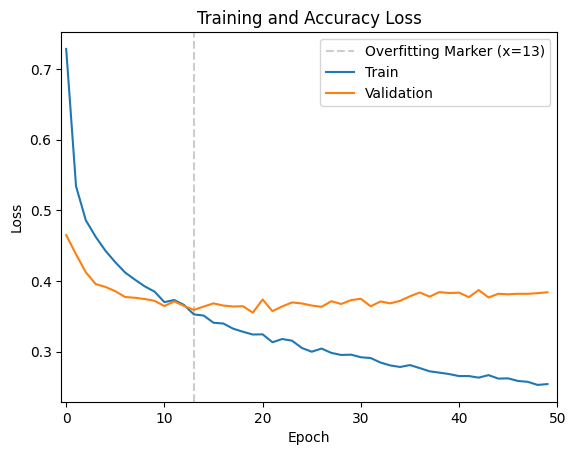

In [23]:
# Plot training and validation loss over time
plt.axvline(x=13, linestyle='--', color = 'gray', alpha = 0.4, label = 'Overfitting Marker (x=13)') # Overfitting Line at x = 20
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')

plt.title('Training and Accuracy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend( loc = 'upper right')

plt.xlim(-0.5, 50)

plt.savefig('cifar10_loss.png', dpi=300)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


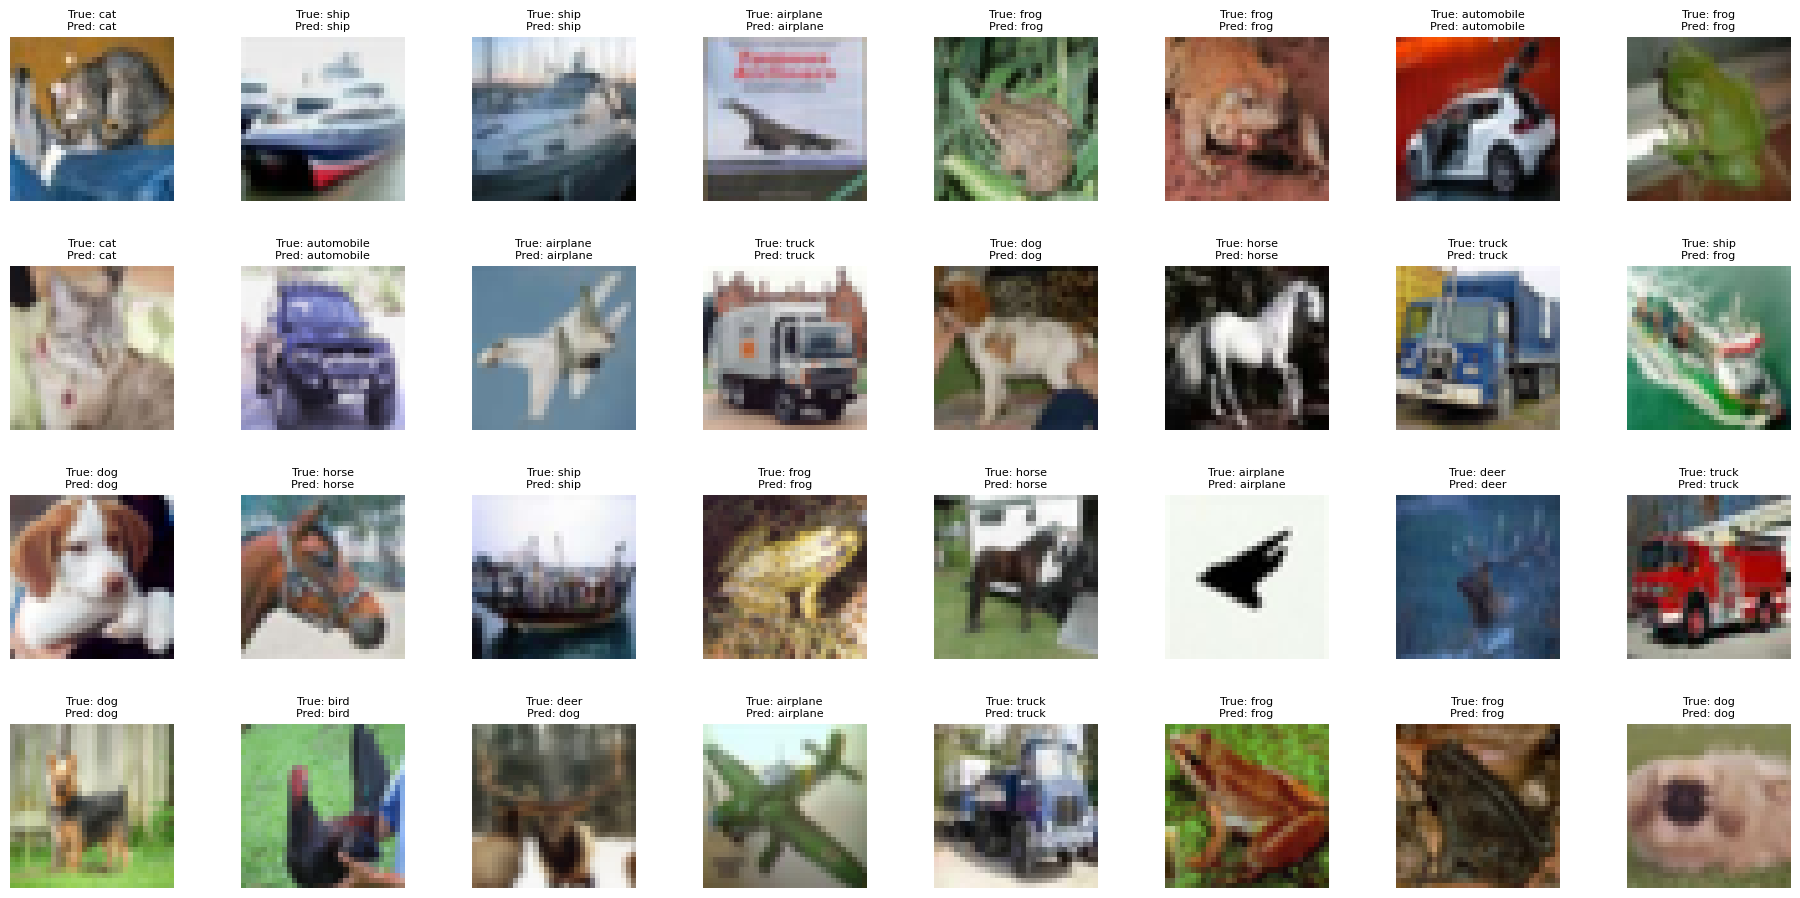

In [21]:
# Get predictions for the test dataset
predictions = model.predict(X_test_proc)

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 32 images from the test dataset with their true and predicted labels
fig = plt.figure(1)
fig.set_size_inches(18.5, 18.5)

for i in range(32):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(X_test[i])  # X_test should now be in the range [0, 1]

    # Adjust indexing for true labels
    true_label = label_mapping[y_test[i]] if len(y_test.shape) == 1 else label_mapping[y_test[i][0]]
    predicted_label = label_mapping[predicted_labels[i]]

    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8)
    plt.axis('off')  # Hide axes for better visualization

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4, wspace=0.30)

plt.savefig('cifar10_inference_fixed.png', dpi=300)
plt.show()